In [ ]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [4]:
#Loading the Dataset
data = pd.read_csv('/content/AQI-and-Lat-Long-of-Countries.csv')

In [5]:
data

,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value,lat,lng
0,51,1,36,0,51,44.7444,44.2031
1,41,1,5,1,41,-5.2900,-44.4900
2,41,1,5,1,41,-11.2958,-41.9869
3,66,1,39,2,66,37.1667,15.1833
4,34,1,34,0,20,53.0167,20.8833
...,...,...,...,...,...,...,...
16690,54,1,34,5,54,37.5516,-77.3285
16691,71,1,39,1,71,49.0650,18.9219
16692,71,1,39,1,71,36.3385,-88.8513
16693,50,1,20,5,50,48.7786,2.2906


In [6]:
data.head()

,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value,lat,lng
0,51,1,36,0,51,44.7444,44.2031
1,41,1,5,1,41,-5.2900,-44.4900
2,41,1,5,1,41,-11.2958,-41.9869
3,66,1,39,2,66,37.1667,15.1833
4,34,1,34,0,20,53.0167,20.8833


In [9]:
#Data Preprocessing-Handle missing values, rename columns, and check data types
data = data.dropna() #remove null values
data.columns = [col.strip().lower() for col in data.columns]

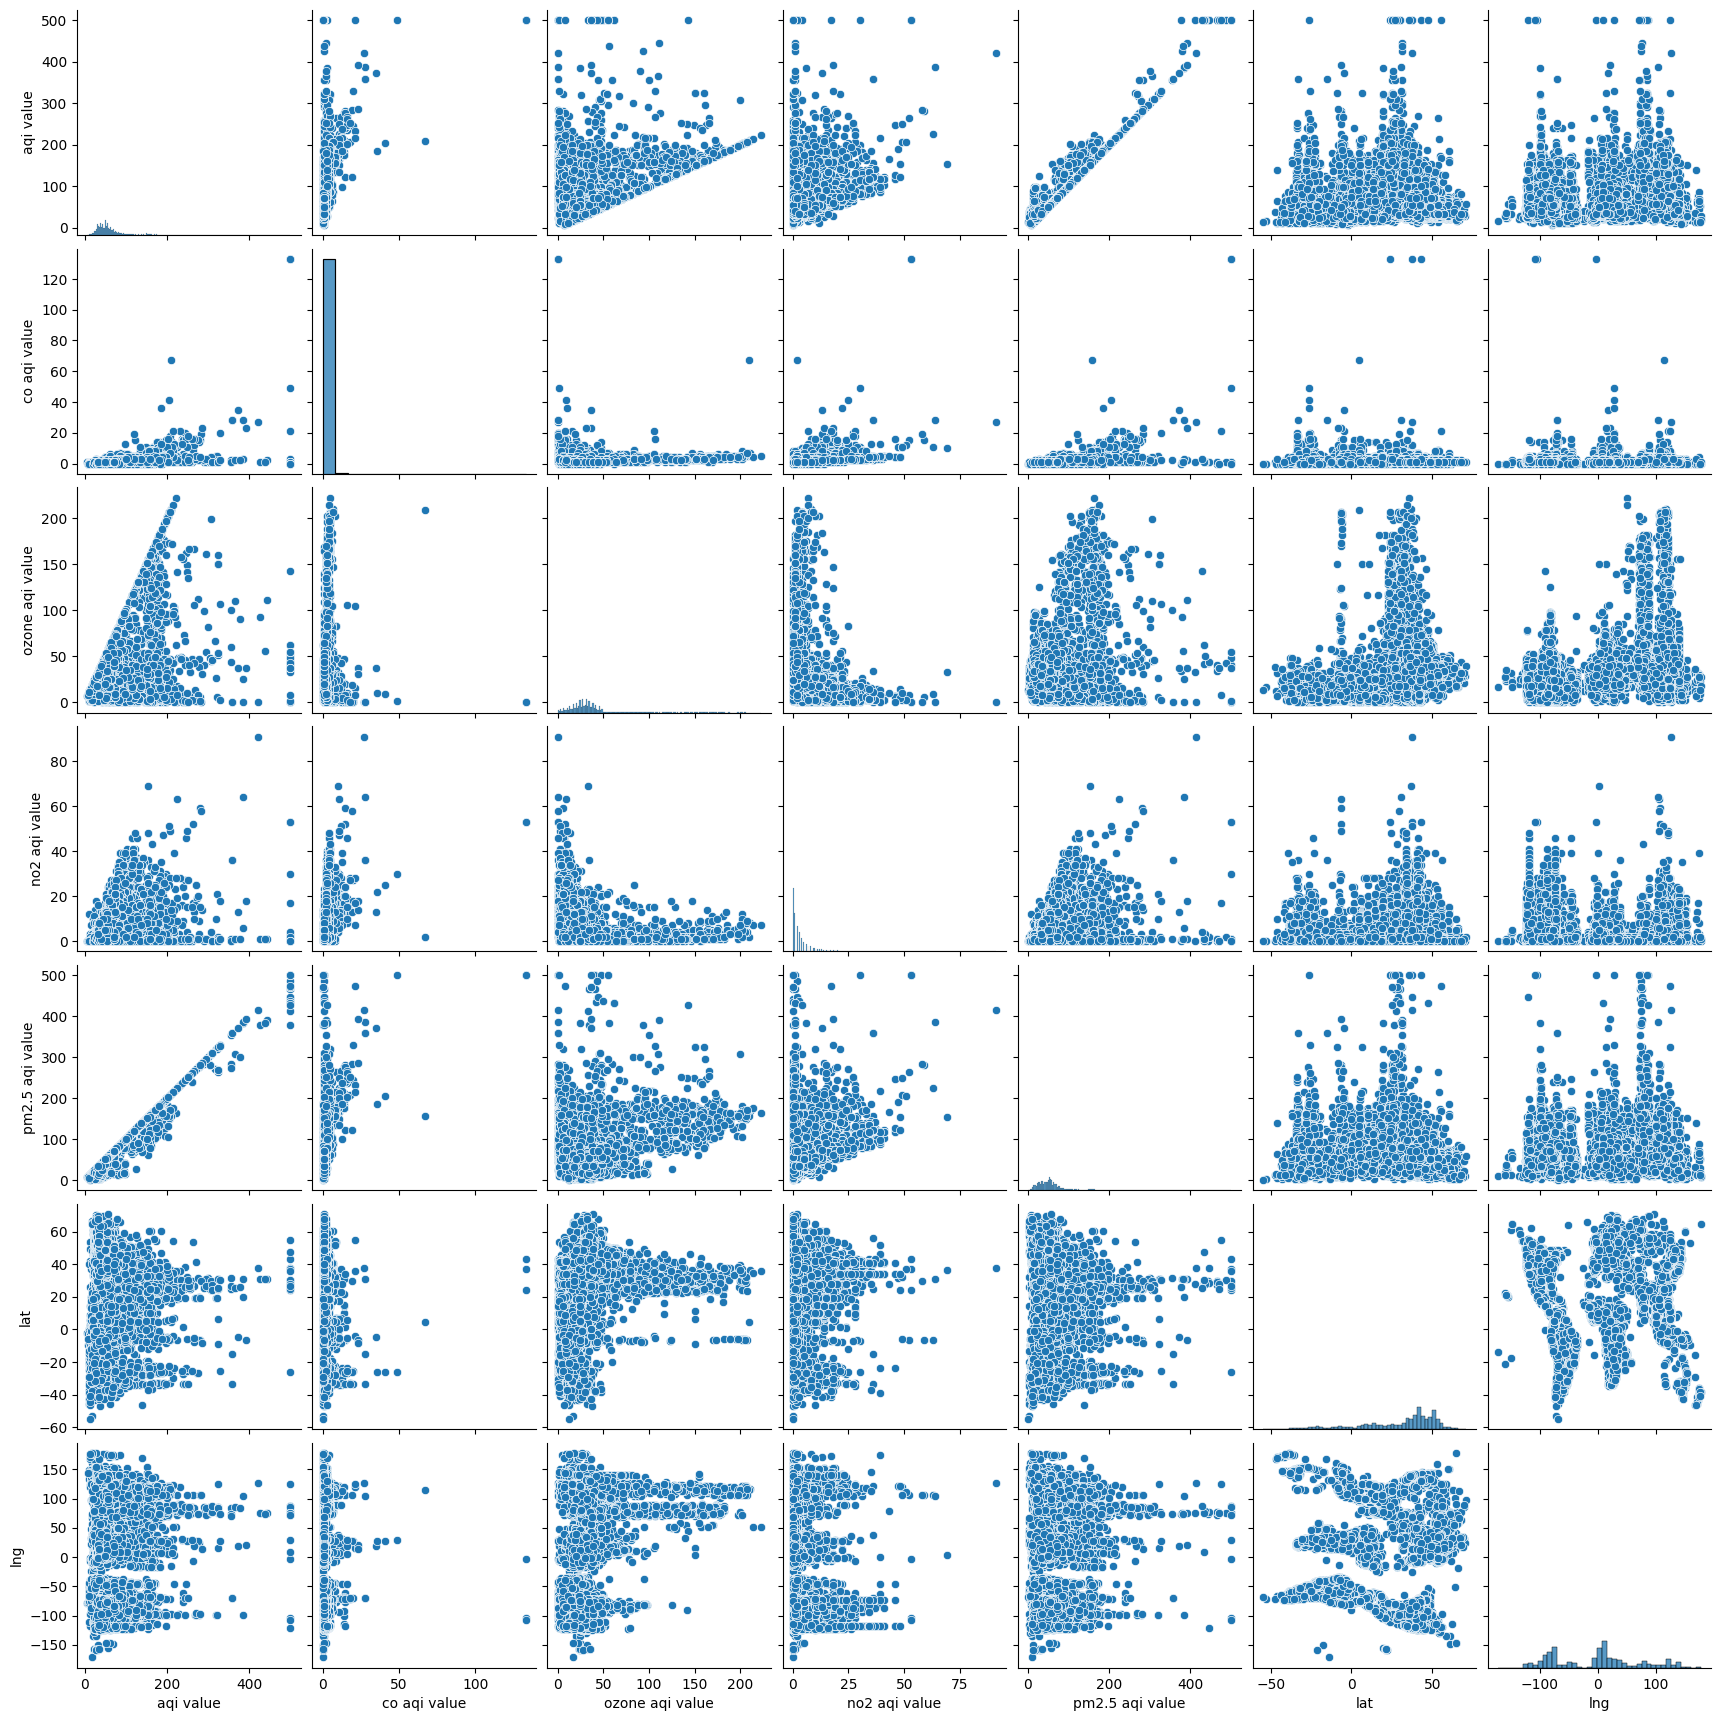

In [10]:
#Exploratory Data Analysis (EDA)-Visualizing relationships between variables
sns.pairplot(data)
plt.show()

<Axes: >

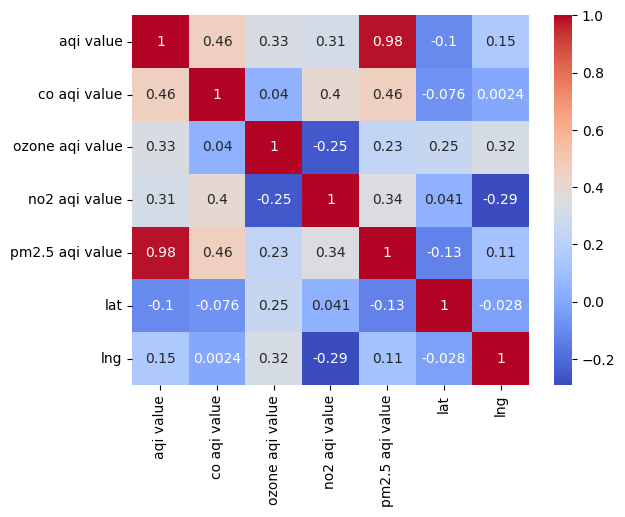

In [11]:
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [13]:
#Feature Selection for training.
X = data[['co aqi value', 'ozone aqi value', 'no2 aqi value', 'pm2.5 aqi value']]
y = data['aqi value']

In [14]:
#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
#Model Training (Random Forest)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [16]:
#Model Evaluation
y_pred = model.predict(X_test)

print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

Mean Absolute Error: 0.08944893680742742
Mean Squared Error: 2.5933745732255167
R2 Score: 0.9984363282525895


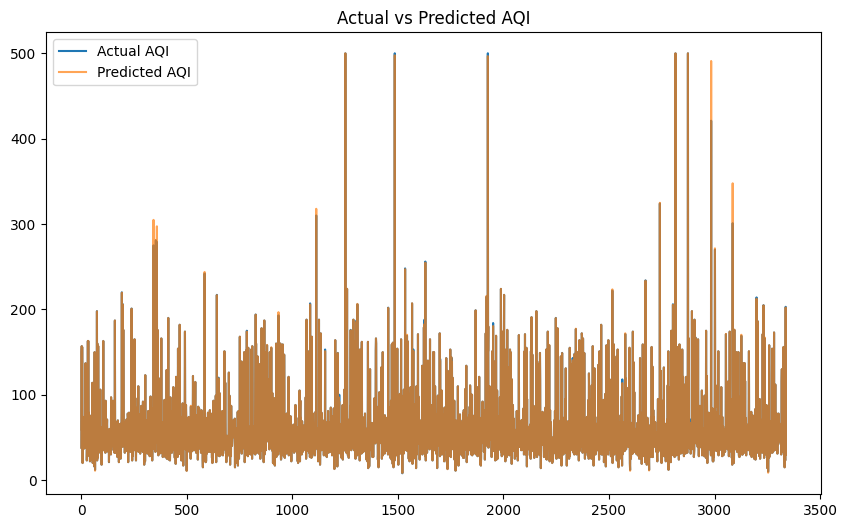

In [17]:
#Plotting Results
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual AQI')
plt.plot(y_pred, label='Predicted AQI', alpha=0.7)
plt.title('Actual vs Predicted AQI')
plt.legend()
plt.show()